<a href="https://colab.research.google.com/github/ncduy0303/Competitive-Programming/blob/master/Autoencoder/Denoising_Autoencoder_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Reference: https://blog.keras.io/building-autoencoders-in-keras.html*

#### 1) Import the necessary libraries:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import mnist

#### 2) Data preprocessing:

In [3]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Normalize the data between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
# Reshape the images
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### 3) Build a convolutional autoencoder model:

In [0]:
# Pass the input
input_img = Input(shape = (28, 28, 1))

In [0]:
# Define the encoder (number of layers decreases as we go deeper)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

In [0]:
# Define the decoder (number of layers increases as we go deeper)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

In [10]:
# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

# Fit the autoencoder
autoencoder.fit(x_train, x_train,
                epochs = 50,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1179 - val_loss: 0.0753
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0739 - val_loss: 0.0718
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0712 - val_loss: 0.0696
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0697 - val_loss: 0.0689
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0687 - val_loss: 0.0677
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0680 - val_loss: 0.0671
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0675 - val_loss: 0.0666
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0663 - val_loss: 0.0656

#### 4) Evaluate the model:

In [0]:
# Predict the result (note that we should have not used the test data as validation for training)
decoded_imgs = autoencoder.predict(x_test)

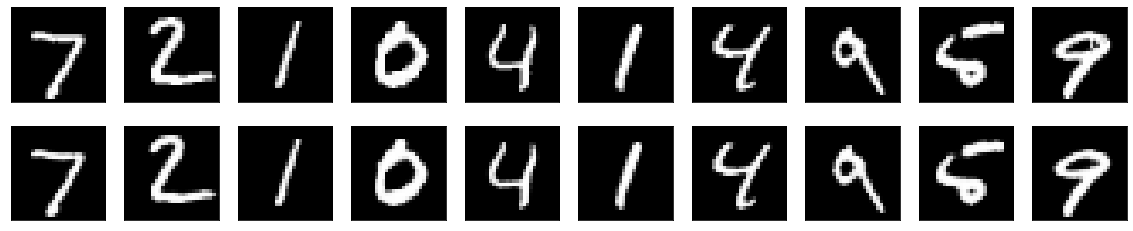

In [12]:
# Compare the encoded images and the decoded images
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 5) Application to image denoising:

In [0]:
# Generate synthetic noisy digits
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [14]:
# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs = 100,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1359 - val_loss: 0.1157
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1141 - val_loss: 0.1108
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1104 - val_loss: 0.1079
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1080 - val_loss: 0.1060
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1064 - val_loss: 0.1048
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1051 - val_loss: 0.1036
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1041 - val_loss: 0.1027
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1032 - val_loss: 0.1020
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1024 - val_loss: 0.1012
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1019 - val_lo

In [0]:
# Predict the result (note that we should have not used the test data as validation for training)
denoised_imgs = autoencoder.predict(x_test_noisy)

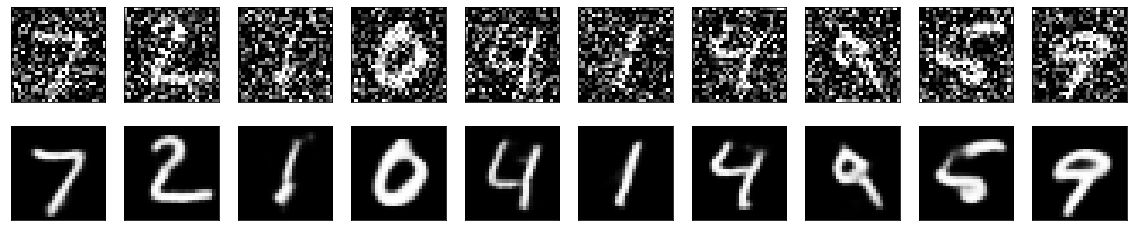

In [16]:
# Compare the noisy images and the denoised images
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original, noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()